### 1. Klassifikation
Trainieren Sie einen **Random Forest Classifier** und eine **SVM**, um vorherzusagen, ob ein Haus "teuer" ist.
Vergleichen Sie die Modelle und visualisieren Sie die **Konfusionsmatrix** des besseren Modells.

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Load data
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# 2. Feature Engineering
X['RoomsPerPerson'] = X['AveRooms'] / X['AveOccup']

# 3. Create Classification Target (Median Split)
# We want to predict whether a house is "expensive" (above the median) or "inexpensive".
median_val = y.median()
y_class = (y > median_val).astype(int) # 1 = Expensive, 0 = Inexpensive

# Split Data (We need sets for regression and classification)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

print("Data prepared.")
print(f"Class distribution: \n{y_class.value_counts()}")

Data prepared.
Class distribution: 
MedHouseVal
0    10323
1    10317
Name: count, dtype: int64


Trainiere Random Forest...
Trainiere SVM...
Random Forest Genauigkeit: 0.8888
SVM Genauigkeit: 0.5177


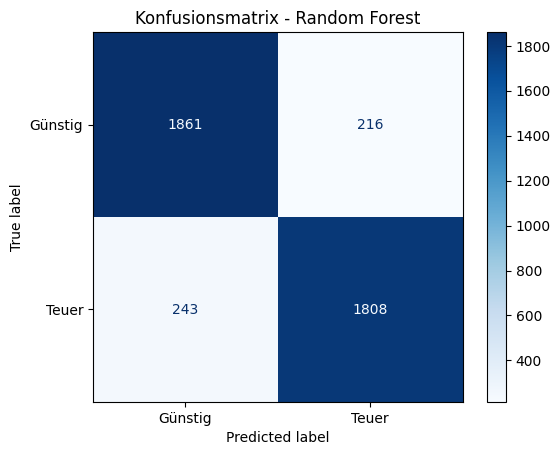

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Modelle initialisieren
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_svm = SVC(random_state=42)

# Training
print("Trainiere Random Forest...")
clf_rf.fit(X_train, y_train_class)
print("Trainiere SVM...")
clf_svm.fit(X_train, y_train_class)

# Auswertung
acc_rf = accuracy_score(y_test_class, clf_rf.predict(X_test))
acc_svm = accuracy_score(y_test_class, clf_svm.predict(X_test))

print(f"Random Forest Genauigkeit: {acc_rf:.4f}")
print(f"SVM Genauigkeit: {acc_svm:.4f}")

# Konfusionsmatrix visualisieren (Random Forest)
cm = confusion_matrix(y_test_class, clf_rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Günstig', 'Teuer'])
disp.plot(cmap='Blues')
plt.title('Konfusionsmatrix - Random Forest')
plt.show()

### 2. Regression
Trainieren Sie einen **Random Forest Regressor**, um den Hauspreis (`MedHouseVal`) vorherzusagen. 
Evaluieren Sie das Modell mit dem **Mean Absolute Error (MAE)** und visualisieren Sie die Vorhersagen im Vergleich zu den tatsächlichen Werten.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Modell initialisieren
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training (mit den originalen y_train Werten)
print("Trainiere Random Forest Regressor...")
reg_rf.fit(X_train, y_train)

# Auswertung
y_pred = reg_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred)

print(f"Random Forest Regressor MAE: {mae_rf:.4f}")

# Vorhersagen visualisieren
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Tatsächliche vs. vorhergesagte Werte (Random Forest Regressor)')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.show()

### 3. Unüberwachtes Lernen
Verwenden Sie **K-Means**, um die Häuser basierend auf ihrem Standort (`Latitude`, `Longitude`) zu clustern.
Visualisieren Sie die Cluster auf einem Streudiagramm.

In [ ]:
from sklearn.cluster import KMeans

# Clustering auf Geodaten
X_geo = X[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_geo)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.scatter(X['Longitude'], X['Latitude'], c=X['Cluster'], cmap='viridis', alpha=0.5, s=10)
plt.title('Geografische Cluster (K-Means)')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.colorbar(label='Cluster')
plt.show()

### 4. Neuronales Netz
Trainieren Sie ein einfaches **Neuronales Netz** (MLP) für die Regression (Vorhersage des Hauspreises).
Skalieren Sie die Daten vorher! Experimentieren Sie mit der Anzahl der Schichten.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Skalierung (Wichtig für NN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modellaufbau
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) # Ausgabeschicht für Regression (keine Aktivierung oder linear)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Training
print("Trainiere Neuronales Netz...")
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Lernprozess visualisieren
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.plot(history.history['val_loss'], label='Validierungsverlust')
plt.title('Modellverlust-Fortschritt')
plt.xlabel('Epochen')
plt.ylabel('Verlust (MSE)')
plt.legend()
plt.show()

# Auswertung
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test MAE: {mae:.4f}")

### 5. Einzelne Vorhersage: Definition des Beispielhauses

Hier definieren wir ein fiktives Haus, das wir für unsere Vorhersagen verwenden werden. Sie können die Werte in der Zelle unten ändern, um zu sehen, wie sich die Vorhersagen für verschiedene Häuser ändern.

In [ ]:
# Erstellen Sie ein fiktives Haus als Beispiel
# Die Werte basieren auf den Durchschnittswerten des Datensatzes und wurden leicht angepasst.
# ÄNDERN SIE DIESE WERTE, UM VERSCHIEDENE HÄUSER ZU TESTEN
sample_house_dict = {
    'MedInc': [3.5],       # Medianeinkommen (in Zehntausend USD)
    'HouseAge': [25],      # Durchschnittliches Hausalter
    'AveRooms': [5.0],     # Durchschnittliche Anzahl der Zimmer
    'AveBedrms': [1.0],    # Durchschnittliche Anzahl der Schlafzimmer
    'Population': [1400],  # Blockpopulation
    'AveOccup': [2.8],     # Durchschnittliche Belegung
    'Latitude': [36.75],   # Nördlicher Breitengrad
    'Longitude': [-119.7]  # Westlicher Längengrad
}
sample_house = pd.DataFrame(sample_house_dict)
sample_house['RoomsPerPerson'] = sample_house['AveRooms'] / sample_house['AveOccup']

# Sicherstellen, dass die Spaltenreihenfolge mit den Trainingsdaten übereinstimmt
sample_house = sample_house[X_train.columns]

print("Beispielhaus erstellt:")
print(sample_house.T)

### 6. Vorhersage: Klassifikation

Jetzt testen wir unsere trainierten Klassifikationsmodelle an dem Haus, das wir gerade definiert haben. Wir wollen sehen, ob die Modelle es als 'Teuer' oder 'Günstig' klassifizieren.

In [ ]:
# Vorhersagen der Klassifikatoren
pred_rf_class = clf_rf.predict(sample_house)[0]
pred_svm_class = clf_svm.predict(sample_house)[0]

# Vorhersagewahrscheinlichkeiten (nur für RF möglich, da SVC nicht mit probability=True trainiert wurde)
proba_rf = clf_rf.predict_proba(sample_house)[0]

print("--- Klassifikationsvorhersage für ein Beispielhaus ---")
print(f"Random Forest sagt: {'Teuer' if pred_rf_class == 1 else 'Günstig'} (Wahrscheinlichkeit: {proba_rf[pred_rf_class]*100:.2f}%)")
print(f"SVM sagt: {'Teuer' if pred_svm_class == 1 else 'Günstig'}")

# Wahrscheinlichkeiten visualisieren
plt.figure(figsize=(6, 4))
bars = plt.bar(['Günstig (0)', 'Teuer (1)'], proba_rf, color=['skyblue', 'salmon'])
plt.title('Random Forest: Vorhersagewahrscheinlichkeit')
plt.ylabel('Wahrscheinlichkeit')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval*100:.2f}%', va='bottom', ha='center')
plt.show()

### 7. Vorhersage: Regression

Jetzt verwenden wir das Regressionsmodell, um den genauen Preis für dasselbe Haus vorherzusagen und das Ergebnis zu visualisieren.

In [ ]:
# Vorhersage mit dem Regressor
predicted_price = reg_rf.predict(sample_house)[0]

print(f"--- Regressionsvorhersage für ein Beispielhaus ---")
# Der Preis ist in Einheiten von 100.000 $
print(f"Vorhergesagter Preis (Random Forest Regressor): ${predicted_price*100000:,.2f}")

# Visualisierung der Vorhersage im Kontext der Testdaten
plt.figure(figsize=(10, 6))
# Streudiagramm der Testdaten
plt.scatter(y_test, y_pred, alpha=0.3, label='Testdaten-Vorhersagen')
# Ideale Linie
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ideale Linie')
# Vorhersage für das Beispielhaus
# Wir plotten gegen den Median der Testzielwerte, da wir keinen "wahren" Wert für unser fiktives Haus haben.
plt.scatter(y_test.median(), predicted_price, color='red', s=150, edgecolor='black', zorder=5, label=f'Beispielhaus-Vorhersage (${predicted_price*100000:,.2f})')

plt.title('Tatsächliche vs. vorhergesagte Werte mit Beispielhaus')
plt.xlabel('Tatsächliche Werte ($100.000)')
plt.ylabel('Vorhergesagte Werte ($100.000)')
plt.legend()
plt.show()